In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df1 = pd.read_csv("SCP_2020-21.csv")
df2 = pd.read_csv("SLB_2020-21.csv")
df3 = pd.read_csv("FCP_2020-21.csv")

In [3]:
df_list = [df1, df2, df3]

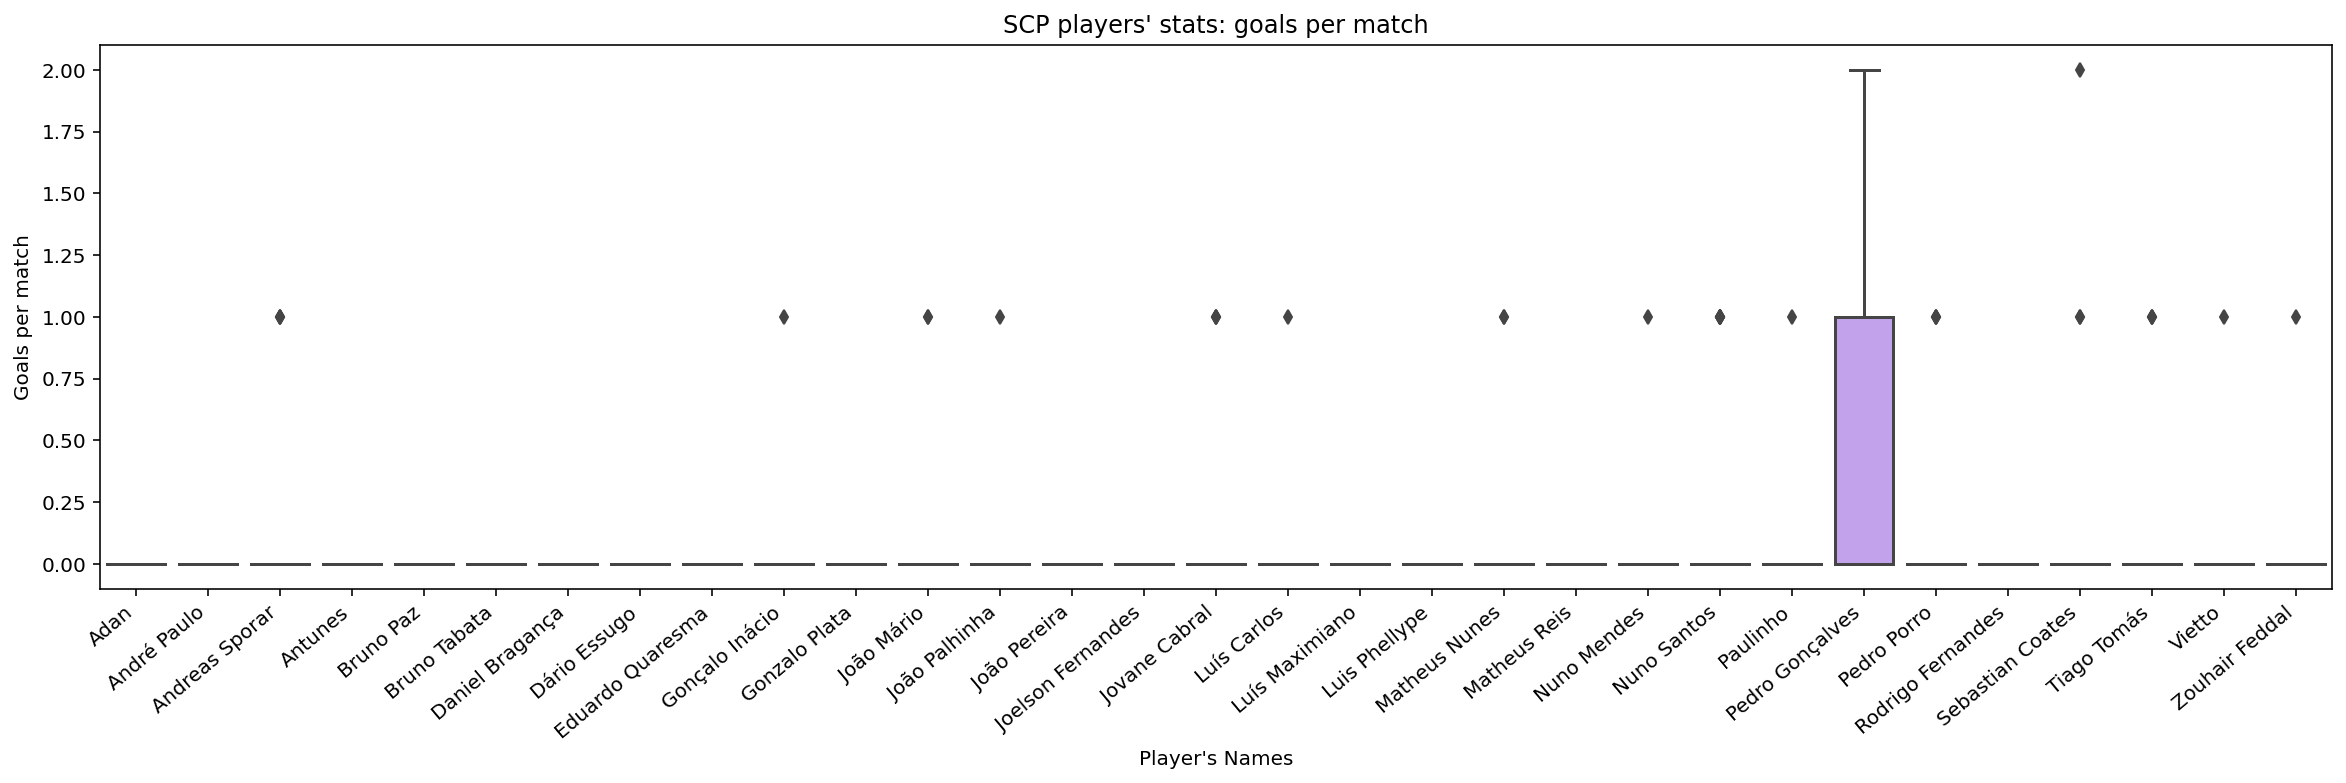

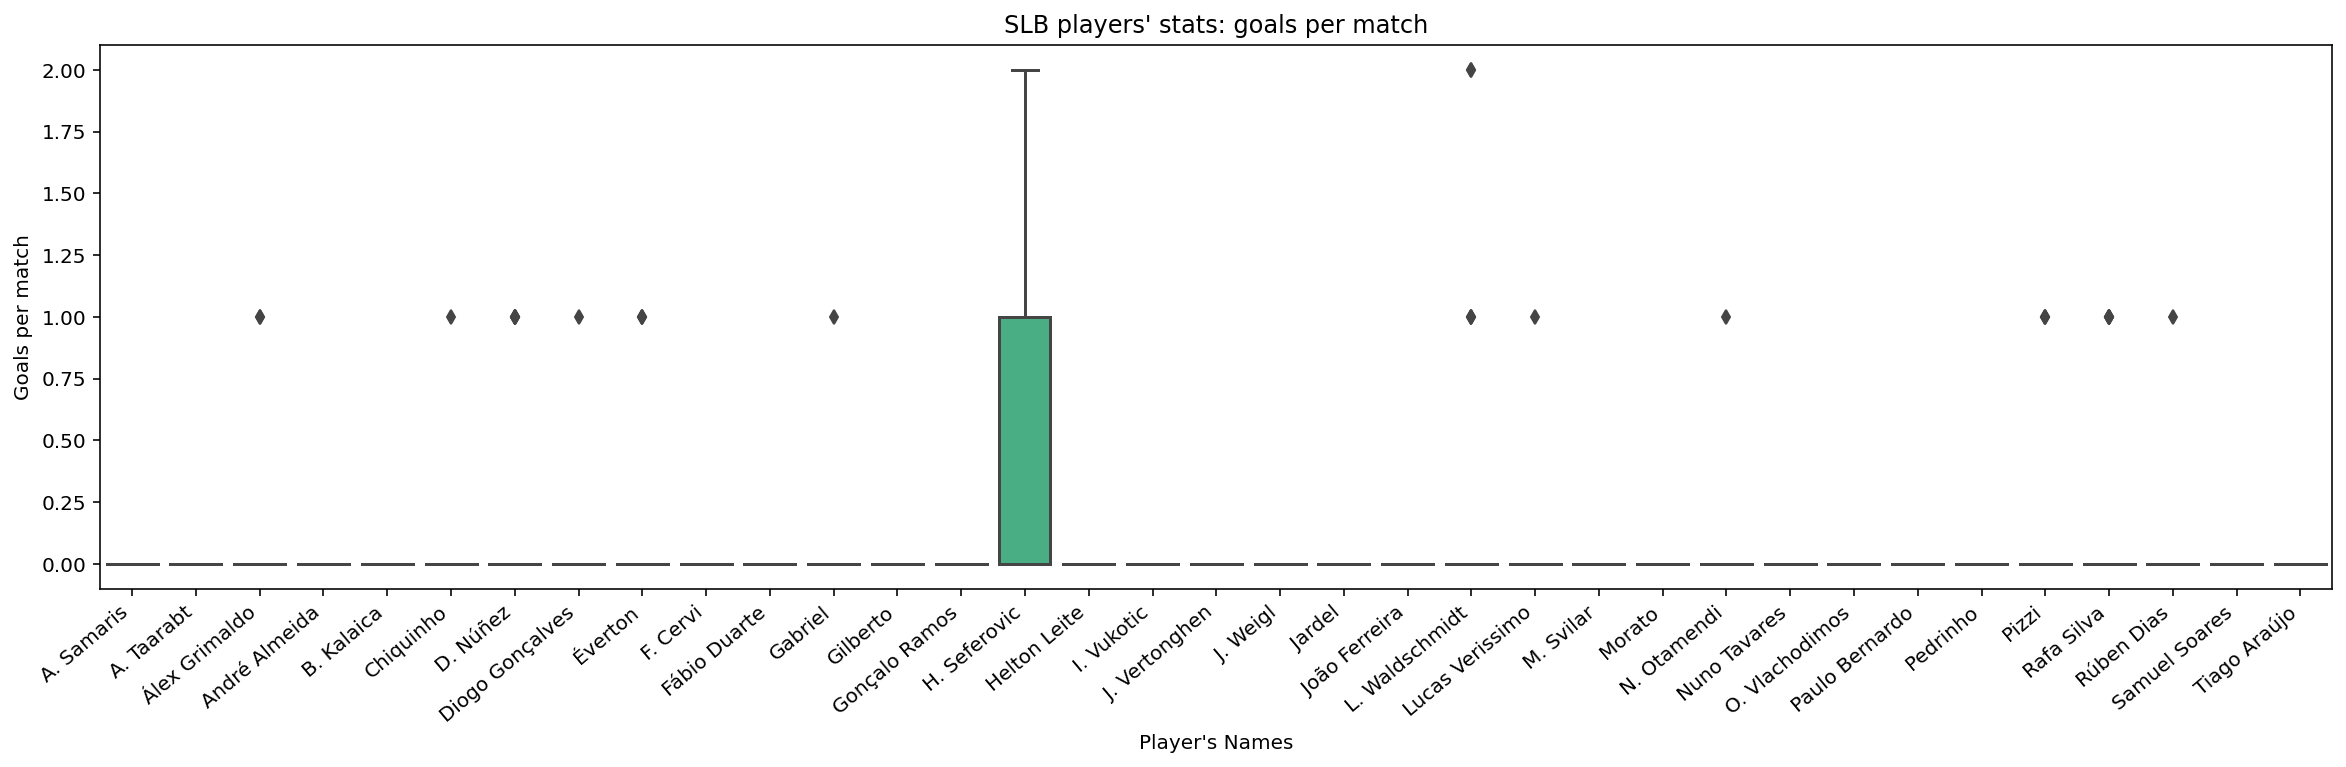

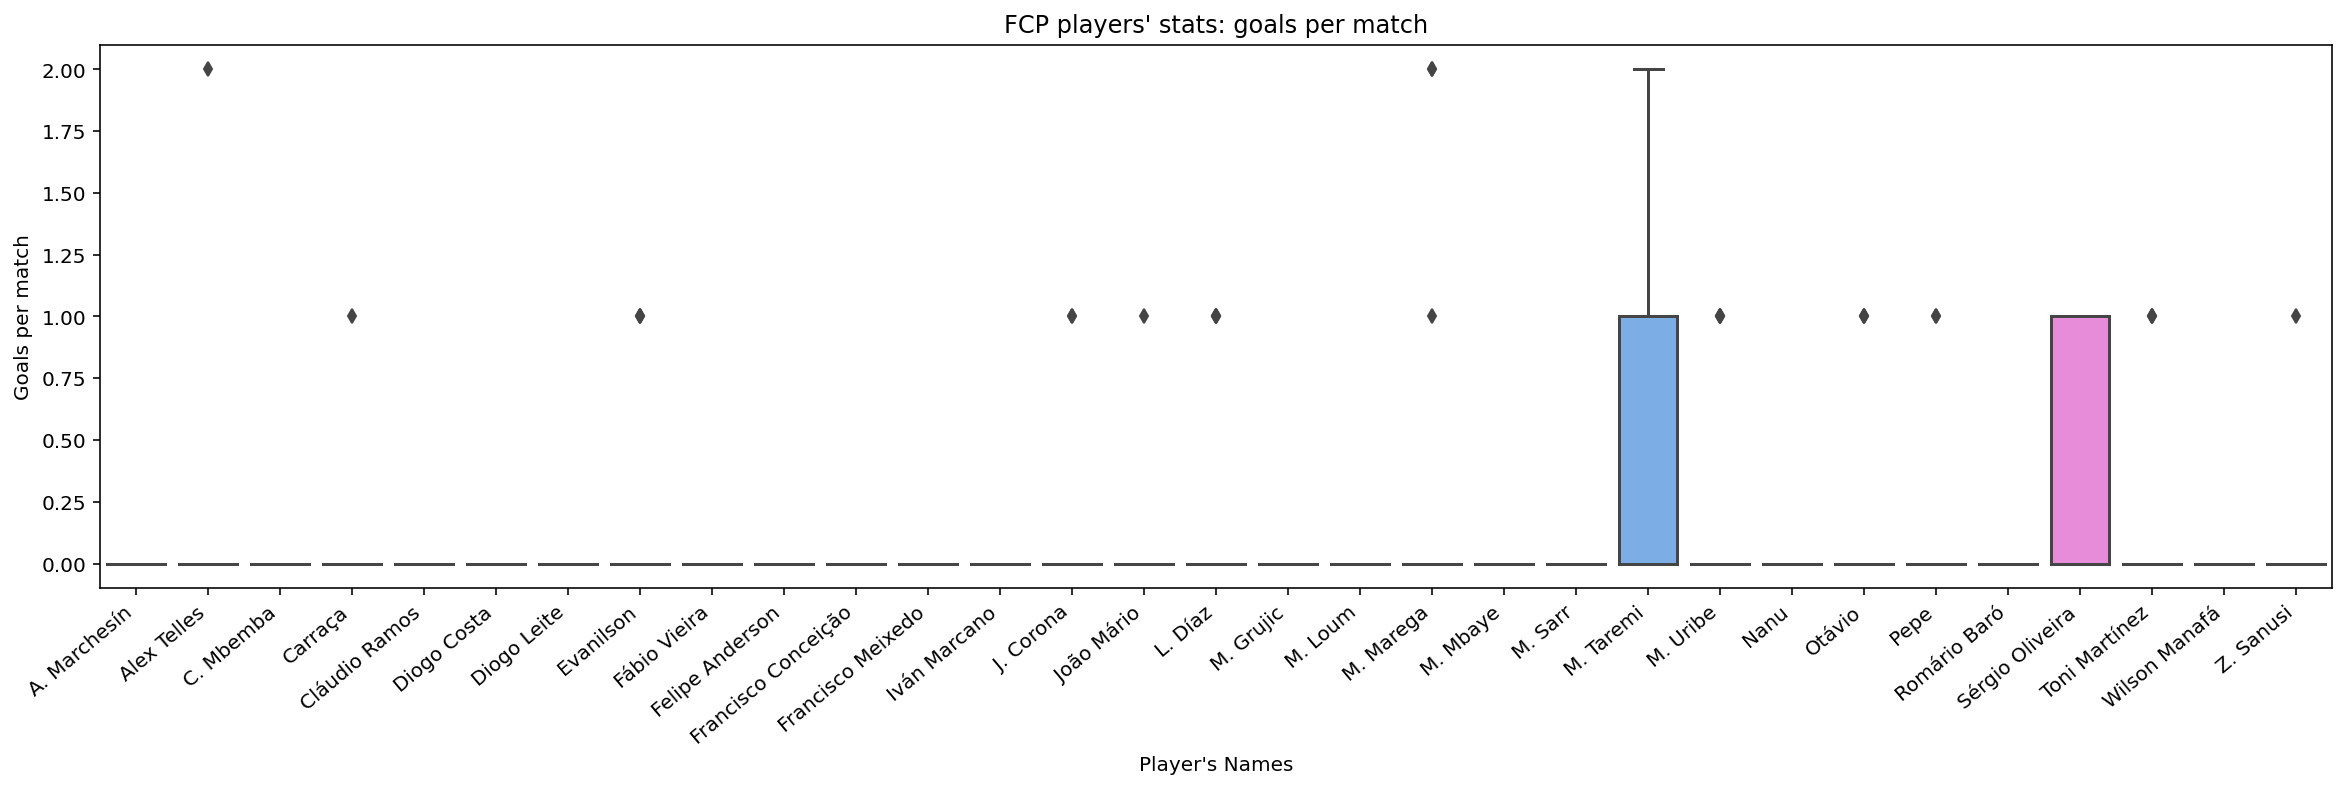

In [4]:
for i in range(0,3):
    plt.figure(figsize=(20,5))
    g = sns.boxplot(x="Player's Name", y="value", data=pd.melt(df_list[i], id_vars=["Player's Name"]))
    g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
    plt.xlabel("Player's Names")
    plt.ylabel("Goals per match")
    if i==0:
        plt.title("SCP players' stats: goals per match")
    elif i==1:
        plt.title("SLB players' stats: goals per match")
    else:
        plt.title("FCP players' stats: goals per match")
    plt.show()

In [5]:
result1 = pd.read_csv("Results_SCP_2020-21.csv")
result2 = pd.read_csv("Results_SLB_2020-21.csv")
result3 = pd.read_csv("Results_FCP_2020-21.csv")

In [6]:
result_list = [result1, result2, result3]

In [22]:
l_train=list()
for k in range(2):
    idx=0
    data_list_train = list()
    for i in range(math.floor(0.60*df_list[k].shape[0])):
        for j in range (1,df_list[k].shape[1]):
            player = df_list[k].iloc[i][df_list[k].columns[0]]
            match = df_list[k].columns[j]
            goals = df_list[k].iloc[i][df_list[k].columns[j]]
            label = result_list[k].iloc[0][result_list[k].columns[j-1]]
            idx=idx+1
            data_train = (idx, player, match, goals, label)
            data_list_train.append(data_train)
    l_train.append(data_list_train)


'Goals Paços/Sporting'

In [0]:
import pyspark as ps
import pyspark.sql.functions as F
from pyspark import SQLContext
from pyspark.ml.feature import RegexTokenizer, HashingTF
from pyspark.ml.classification import LogisticRegression
from pyspark.sql.functions import avg

In [0]:
spark = ps.sql.SparkSession.builder \
    .master('local[4]') \
    .appName('spark-project') \
    .getOrCreate()
    
sc = spark.sparkContext
sqlContext = SQLContext(sc)

In [0]:
training_SCP = spark.createDataFrame(l_train[0], ['id', 'Player', 'Match', 'Goals', 'Label'])
training_SLB = spark.createDataFrame(l_train[1], ['id', 'Player', 'Match', 'Goals', 'Label'])
training_FCP = spark.createDataFrame(l_train[2], ['id', 'Player', 'Match', 'Goals', 'Label'])

In [0]:
regexTokenizer = RegexTokenizer(inputCol = 'text', outputCol = "tokens", pattern ="\\W")   # it is a transformer; \\W splits by widespace
hashingTF = HashingTF(inputCol = "tokens", outputCol = "features")
lr = LogisticRegression(maxIter = 10, regParam = 0.001)

In [0]:
tokens_SCP = regexTokenizer.transform(training_SCP)         # transform the original df to give us the tokenized words
hashes_SCP = hashingTF.transform(tokens_SCP)
logistic_model_SCP = lr.fit(hashes_SCP)               # uses columns named features / label by default

tokens_SLB = regexTokenizer.transform(training_SLB)         # transform the original df to give us the tokenized words
hashes_SLB = hashingTF.transform(tokens_SLB)
logistic_model_SLB = lr.fit(hashes_SLB)               # uses columns named features / label by default

tokens_FCP = regexTokenizer.transform(training_FCP)         # transform the original df to give us the tokenized words
hashes_FCP = hashingTF.transform(tokens_FCP)
logistic_model_FCP = lr.fit(hashes_FCP)               # uses columns named features / label by default

In [0]:
l_test=list()
for k in range(2):
    idx=0
    data_list_test = list()
    for i in range(math.floor(0.60*df_list[k].shape[0]),df_list[k].shape[0]):
        for j in range (1,df_list[k].shape[1]):
            player = df_list[k].iloc[i][df_list[k].columns[0]]
            match = df_list[k].columns[j]
            goals = df_list[k].iloc[i][df_list[k].columns[j]]
            idx=idx+1
            data_test = (idx, player, match, goals)
            data_list_test.append(data)
    l_test.append(data_list_test)

In [0]:
test_SCP = spark.createDataFrame(l_test[0], ['id', 'Player', 'Match', 'Goals'])
test_SLB = spark.createDataFrame(l_test[1], ['id', 'Player', 'Match', 'Goals'])
test_FCP = spark.createDataFrame(l_test[2], ['id', 'Player', 'Match', 'Goals'])

In [0]:
preds_SCP = logistic_model.transform(hashingTF.transform(regexTokenizer.transform(test_SCP)))
stats_SCP = preds_SCP.select(col('Match'), col('prediction'), preds_SCP.probability.cast('float').alias('probability'))

preds_SLB = logistic_model.transform(hashingTF.transform(regexTokenizer.transform(test_SLB)))
stats_SLB = preds_SLB.select(col('Match'), col('prediction'), preds_SLB.probability.cast('float').alias('probability'))

preds_FCP = logistic_model.transform(hashingTF.transform(regexTokenizer.transform(test_FCP)))
stats_FCP = preds_FCP.select(col('Match'), col('prediction'), preds_FCP.probability.cast('float').alias('probability'))

In [0]:
plt.figure(figsize=(20,5))
g = sns.boxplot(x="Match", y="probability", data=pd.melt(stats_SCP, id_vars=["Match"]))
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Match")
plt.ylabel("Probability to win")
plt.title("SCP likely performance")
plt.show()

plt.figure(figsize=(20,5))
g = sns.boxplot(x="Match", y="probability", data=pd.melt(stats_SLB, id_vars=["Match"]))
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Match")
plt.ylabel("Probability to win")
plt.title("SLB likely performance")
plt.show()

plt.figure(figsize=(20,5))
g = sns.boxplot(x="Match", y="probability", data=pd.melt(stats_FCP, id_vars=["Match"]))
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Match")
plt.ylabel("Probability to win")
plt.title("FCP likely performance")
plt.show()

In [0]:
stats_SCP.groupBy('Match', 'prediction').agg(F.avg('probability').alias('probability to win a match')).show()
stats_SLB.groupBy('Match', 'prediction').agg(F.avg('probability').alias('probability to win a match')).show()
stats_FCP.groupBy('Match', 'prediction').agg(F.avg('probability').alias('probability to win a match')).show()